In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from hmmlearn import hmm
from IOHMM_v2 import IOHMM_model

In [2]:
# Generate data
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
hmm_model.startprob_ = np.array([0.0, 1.0])
hmm_model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])
hmm_model.means_ = np.array([[-10.0], [10.0]])
hmm_model.covars_ = np.array([[.1], [.1]])
# Sample data
X, Z = hmm_model.sample(20)
# Dataframe
data = pd.DataFrame(X, columns=['X'])
data['Z'] = Z

output = torch.tensor(data['X'].values, dtype=torch.float32)
input = torch.ones(output.size(), dtype=torch.float32).unsqueeze(1)

In [3]:
print(data)

            X  Z
0   10.504885  1
1   10.234028  1
2   10.302625  1
3   10.330999  1
4    9.966444  1
5    9.774937  1
6   10.300669  1
7   10.491599  1
8    9.997872  1
9   10.631613  1
10  -9.838185  0
11  -9.929609  0
12  -9.977329  0
13  -9.991960  0
14  -9.521462  0
15 -10.678681  0
16  -9.734003  0
17  -9.378005  0
18  -9.610062  0
19  -9.580164  0


In [4]:
print("Input size:", input.size())
print("Output size:", output.size())

Input size: torch.Size([20, 1])
Output size: torch.Size([20])


In [5]:
iohmm = IOHMM_model(num_states=2, inputs=input, outputs=output, max_iter=50, tol=1e-40)

In [6]:
print("Initial parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Initial parameters:
Theta transition:Parameter containing:
tensor([[[-0.3539, -0.0261],
         [ 1.5926,  0.9153]],

        [[ 0.7992,  0.3282],
         [-0.7039,  2.2175]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[ 0.1690, -1.3195],
        [-0.3185, -0.8535]], requires_grad=True)


In [7]:
iohmm.baum_welch()

iteration 0
old likelihood: -inf
iteration 1
old likelihood: tensor([[-89.4763]])
iteration 2
old likelihood: tensor([[-86.8117]])
iteration 3
old likelihood: tensor([[-85.5390]])
iteration 4
old likelihood: tensor([[-84.7287]])
iteration 5
old likelihood: tensor([[-84.1144]])
iteration 6
old likelihood: tensor([[-83.5987]])
iteration 7
old likelihood: tensor([[-83.1375]])
iteration 8
old likelihood: tensor([[-82.7116]])
iteration 9
old likelihood: tensor([[-82.3134]])
iteration 10
old likelihood: tensor([[-81.9362]])
iteration 11
old likelihood: tensor([[-81.5817]])
iteration 12
old likelihood: tensor([[-81.2476]])
iteration 13
old likelihood: tensor([[-80.9295]])
iteration 14
old likelihood: tensor([[-80.6318]])
iteration 15
old likelihood: tensor([[-80.3517]])
iteration 16
old likelihood: tensor([[-80.0899]])
iteration 17
old likelihood: tensor([[-79.8443]])
iteration 18
old likelihood: tensor([[-79.6126]])
iteration 19
old likelihood: tensor([[-79.3969]])
iteration 20
old likelihoo

In [8]:
print("Final parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Final parameters:
Theta transition:Parameter containing:
tensor([[[-1.2319, -0.9040],
         [ 2.5864,  1.9091]],

        [[ 1.6771,  1.2061],
         [-1.6977,  1.2237]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[ 0.2979, -1.1906],
        [-0.1875, -0.7225]], requires_grad=True)


[-inf, tensor([[-89.4763]]), tensor([[-86.8117]]), tensor([[-85.5390]]), tensor([[-84.7287]]), tensor([[-84.1144]]), tensor([[-83.5987]]), tensor([[-83.1375]]), tensor([[-82.7116]]), tensor([[-82.3134]]), tensor([[-81.9362]]), tensor([[-81.5817]]), tensor([[-81.2476]]), tensor([[-80.9295]]), tensor([[-80.6318]]), tensor([[-80.3517]]), tensor([[-80.0899]]), tensor([[-79.8443]]), tensor([[-79.6126]]), tensor([[-79.3969]]), tensor([[-79.1951]]), tensor([[-79.0051]]), tensor([[-78.8281]]), tensor([[-78.6607]]), tensor([[-78.5059]]), tensor([[-78.3592]]), tensor([[-78.2222]]), tensor([[-78.0925]]), tensor([[-77.9707]]), tensor([[-77.8558]]), tensor([[-77.7485]]), tensor([[-77.6468]]), tensor([[-77.5495]]), tensor([[-77.4593]]), tensor([[-77.3723]]), tensor([[-77.2906]]), tensor([[-77.2140]]), tensor([[-77.1400]]), tensor([[-77.0700]]), tensor([[-77.0027]]), tensor([[-76.9393]]), tensor([[-76.8802]]), tensor([[-76.8218]]), tensor([[-76.7662]]), tensor([[-76.7142]]), tensor([[-76.6641]]), ten

/tmp/ipykernel_11565/4278840530.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]


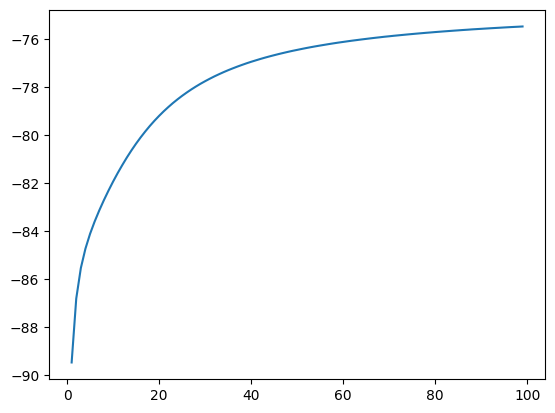

In [9]:
print(iohmm.history)

# Convert tensors to floats
history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]

# Plot the history
plt.plot(history)

In [10]:
#iohmm.viterbi()

IndexError: index 2 is out of bounds for dimension 1 with size 2

In [ ]:
iohmm.plot_state_distribution()